In [4]:
#Import libraries
import pandas as pd
import numpy as np
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec
from transformers import pipeline
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
#Read in 'twitter_df'
twitter_df = pd.read_csv("../dataset/twitter_df.csv")

In [3]:
#Check shape
twitter_df.shape

(22153, 8)

In [4]:
#Drop Unnamed: 0 column
twitter_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
twitter_df.head()

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,user_location_cleaned,polarity
0,1416181616846811137,2021-07-16 23:43:03+00:00,🏡 #RemoteWork is on the rise &amp; slowly beco...,rise slowly becoming normal which mean need re...,"New York, NY",US,1
1,1416181380279635970,2021-07-16 23:42:07+00:00,Opportunity to join a fantastic team at a hi-t...,opportunity join fantastic team tech fast pace...,London | New York,US,1
2,1416181225979473920,2021-07-16 23:41:30+00:00,Good news for #JobSeekers open to #RemoteWork!...,good news open this excellent report from remo...,Sydney | Hong Kong | Singapore,HK,1
3,1416180635903868934,2021-07-16 23:39:09+00:00,Four Ways to Energize a Post-Pandemic Workforc...,four way energize post pandemic workforce,"Chicago, IL",US,1
4,1416180231350759425,2021-07-16 23:37:33+00:00,🚑 These are the tools that will save your #Rem...,these tool that will save your google meet too...,"Duluth, GA",US,0


### Logistic Regression

In [6]:
# twitter_df = pd.get_dummies(twitter_df, columns=['user_location_cleaned'])

In [7]:
# #https://www.geeksforgeeks.org/get-day-from-date-in-pandas-python/
# twitter_df['tweet_posted_on'] = pd.to_datetime(twitter_df['tweet_posted_on'])
# twitter_df['dayOfWeek'] = twitter_df['tweet_posted_on'].dt.day_name()

In [8]:
# twitter_df = pd.get_dummies(twitter_df, columns=['dayOfWeek'])

In [9]:
# X = twitter_df.drop(columns=['tweet_id','tweet_posted_on','tweets','user_location','polarity','user_location_cleaned'],inplace=False)

In [10]:
X = twitter_df['cleaned_tweets']
X.head()

0    rise slowly becoming normal which mean need re...
1    opportunity join fantastic team tech fast pace...
2    good news open this excellent report from remo...
3            four way energize post pandemic workforce
4    these tool that will save your google meet too...
Name: cleaned_tweets, dtype: object

In [11]:
# y = twitter_df['polarity']

In [12]:
# y.value_counts(normalize=True)

In [13]:
# from sklearn.model_selection import train_test_split, cross_val_score
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) 

In [14]:
# X_train.head()

In [15]:
#Create our contextual stop words
stops = ["online", "home", "remote", "work", "working","pandemic","business", \
               "internet", "remotework", "online","team","office","company","hybrid","employee","looking"]

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
cv = CountVectorizer(stop_words=stops+stopwords.words('english'),
                    ngram_range=(2,2)) 
cv_train = cv.fit_transform(X.values.astype('U'))  

In [515]:
# sc = StandardScaler() # Instantiating the standard scaler
# sc.fit(X) #Fit to train data 
# X_sc = sc.fit_transform(X)

In [516]:
# np.where(X_train.isnull() == True)

In [517]:
# X_train = X_train.dropna().reset_index(drop=True)
# X_test = X_test.dropna().reset_index(drop=True)


In [518]:
# cv_train = cv.fit_transform(X_train)            
# cv_test = cv.transform(X_test)

In [522]:
cv_train

<22153x64143 sparse matrix of type '<class 'numpy.int64'>'
	with 140105 stored elements in Compressed Sparse Row format>

In [17]:
cv_train_df = pd.DataFrame(cv_train.toarray(), columns = cv.get_feature_names())
cv_train_df

,aapka bahut,aapki mentorship,ababa cashier,ababa receptionist,abacus service,abandon altogether,abandon idea,abandoned worker,abandoning firm,abap software,...,zoom world,zoombucks scam,zoomer check,zooming customer,zotec partner,zubair zahid,zuckerberg tell,zynga hiring,zype hiring,zyte formerly
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
cv_train_df.sum().sort_values(ascending=False).head(15)

software engineer           428
full time                   261
hiring remotely             240
full stack                  216
make money                  199
competitive compensation    190
find basic                  175
design starting             175
uniquely design             175
starting basic              175
basic find                  175
type full                   168
success rebuild             157
finance post                157
ebooks key                  157
dtype: int64

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(Z_train, y_train) 

LogisticRegression()

In [86]:
print(f"Logistic Regression Accuracy: {logreg.score(Z_train, y_train)}")
print(" ")
print(f"Logistic Regression Accuracy: {logreg.score(Z_test, y_test)}")
print(" ")

Logistic Regression Accuracy: 0.5285301552907187
 
Logistic Regression Accuracy: 0.5278931215020762
 


In [80]:
list(zip(np.exp(logreg.coef_[0]),X.columns))

[(1.013831832049074, 'user_location_cleaned_AE'),
 (0.9430056871142842, 'user_location_cleaned_AL'),
 (1.0360541483968315, 'user_location_cleaned_AR'),
 (1.1089513104951738, 'user_location_cleaned_AT'),
 (0.9961079263405661, 'user_location_cleaned_AU'),
 (1.0413809529902447, 'user_location_cleaned_BD'),
 (1.0147442989979565, 'user_location_cleaned_BE'),
 (1.0635787923136852, 'user_location_cleaned_BF'),
 (0.9921881643349788, 'user_location_cleaned_BG'),
 (1.0605483246842504, 'user_location_cleaned_BH'),
 (1.0605483246842502, 'user_location_cleaned_BM'),
 (0.988624512613504, 'user_location_cleaned_BR'),
 (1.0, 'user_location_cleaned_BW'),
 (0.9965856698720277, 'user_location_cleaned_CA'),
 (0.9681755446125099, 'user_location_cleaned_CH'),
 (0.9987395066363531, 'user_location_cleaned_CL'),
 (1.0605483246842504, 'user_location_cleaned_CM'),
 (0.9929128711815479, 'user_location_cleaned_CN'),
 (1.0016350779036634, 'user_location_cleaned_CO'),
 (0.9922331586245134, 'user_location_cleaned_CR'

In [81]:
preds = logreg.predict(Z_test)
preds[:5] # Generate predictions.

array([1, 1, 0, 1, 1])

In [90]:
pd.Series(preds).value_counts()

1    4083
0    1456
dtype: int64

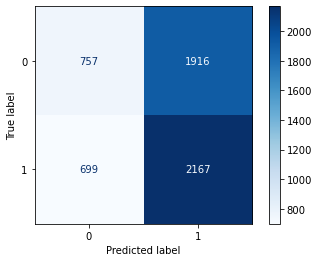

In [84]:
from sklearn.metrics import  confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(logreg, Z_test, y_test, cmap='Blues', 
                      values_format='d')

In [85]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
tn, fp, fn, tp

(757, 1916, 699, 2167)

### Word2Vec

In [303]:
corpus = api.load('text8')
model = Word2Vec(corpus)

In [304]:
#Code written by Caroline
def get_avg_vec(text):
    try:
        # make a list of only the words in the document that are in the word2vec vocabulary
        valid_words = [word for word in text.lower().split() if word in model.wv.key_to_index]
        
        if len(valid_words) == 0:
            print();
            return np.zeros(shape=(100,))
        else:
            # return average word vector, for words in the document that exist in the vocab
            return np.mean([model.wv.get_vector(word) for word in valid_words], axis=0)
    except AttributeError:
        return np.zeros(shape=(100,))

In [305]:
avg_vecs = [get_avg_vec(doc) for doc in twitter_df['cleaned_tweets']]

In [306]:
vec_df = pd.DataFrame(avg_vecs)

In [307]:
vec_df.shape, twitter_df.shape

((22153, 100), (22153, 116))

In [13]:
full_df = pd.concat([twitter_df, vec_df], axis=1)

In [14]:
full_df = full_df.reset_index(drop=True)

In [15]:
full_df.head()

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,user_location_cleaned,polarity,aapka bahut,aapki mentorship,ababa cashier,...,zoom world,zoombucks scam,zoomer check,zooming customer,zotec partner,zubair zahid,zuckerberg tell,zynga hiring,zype hiring,zyte formerly
0,1416181616846811137,2021-07-16 23:43:03+00:00,🏡 #RemoteWork is on the rise &amp; slowly beco...,rise slowly becoming normal which mean need re...,"New York, NY",US,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1416181380279635970,2021-07-16 23:42:07+00:00,Opportunity to join a fantastic team at a hi-t...,opportunity join fantastic team tech fast pace...,London | New York,US,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1416181225979473920,2021-07-16 23:41:30+00:00,Good news for #JobSeekers open to #RemoteWork!...,good news open this excellent report from remo...,Sydney | Hong Kong | Singapore,HK,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1416180635903868934,2021-07-16 23:39:09+00:00,Four Ways to Energize a Post-Pandemic Workforc...,four way energize post pandemic workforce,"Chicago, IL",US,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1416180231350759425,2021-07-16 23:37:33+00:00,🚑 These are the tools that will save your #Rem...,these tool that will save your google meet too...,"Duluth, GA",US,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
vec_col_names = full_df.columns[7:]

In [17]:
vec_cols = full_df[vec_col_names]

In [ ]:
X=vec_cols
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled[0:1]

### DBSCAN

In [314]:
db = DBSCAN(eps=8, min_samples=15)
db.fit(X_scaled)

DBSCAN(eps=8, min_samples=15)

In [315]:
full_df['cluster_labels'] = db.labels_

In [1]:
# full_df['cluster_labels'].value_counts()

In [20]:
# full_df[full_df['cluster_labels'] == -1]

In [324]:
full_df['tweets'].loc[20042]

'#influencers #celebrities #contentcreators #workfromhome #startyourownbusiness #makemoneyfromhome #affiliate #affiliatemarketing Check my website for #affiliate #referral #cashback #crypto #shopping #travel #business #dogecoin #bitcoin https://t.co/vBHLD11zwQ'

In [325]:
full_df['tweets'].loc[20378]

'#Workfromhome #remote #work #remotework #affiliateprogram #affiliatemarketing Check my website for #affiliate #referral #cashback #crypto #shopping #travel #business #dogecoin #bitcoin https://t.co/vBHLD11zwQ'

### k-means

In [22]:
full_df = pd.concat([twitter_df, cv_train_df], axis=1)

In [23]:
full_df = full_df.reset_index(drop=True)

In [24]:
full_df

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,user_location_cleaned,polarity,aapka bahut,aapki mentorship,ababa cashier,...,zoom world,zoombucks scam,zoomer check,zooming customer,zotec partner,zubair zahid,zuckerberg tell,zynga hiring,zype hiring,zyte formerly
0,1416181616846811137,2021-07-16 23:43:03+00:00,🏡 #RemoteWork is on the rise &amp; slowly beco...,rise slowly becoming normal which mean need re...,"New York, NY",US,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1416181380279635970,2021-07-16 23:42:07+00:00,Opportunity to join a fantastic team at a hi-t...,opportunity join fantastic team tech fast pace...,London | New York,US,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1416181225979473920,2021-07-16 23:41:30+00:00,Good news for #JobSeekers open to #RemoteWork!...,good news open this excellent report from remo...,Sydney | Hong Kong | Singapore,HK,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1416180635903868934,2021-07-16 23:39:09+00:00,Four Ways to Energize a Post-Pandemic Workforc...,four way energize post pandemic workforce,"Chicago, IL",US,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1416180231350759425,2021-07-16 23:37:33+00:00,🚑 These are the tools that will save your #Rem...,these tool that will save your google meet too...,"Duluth, GA",US,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22148,1419510570206773249,2021-07-26 04:11:07+00:00,RT @remotists: @EnsembleIQ is currently lookin...,currently looking remote digital operation man...,Everywhere,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22149,1419510292581658626,2021-07-26 04:10:01+00:00,RT @sayalook: #GoodMorningTwitterWorld \n\nLet...,have nice productive,Jammu And Kashmir,IN,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22150,1419510282825740289,2021-07-26 04:09:59+00:00,RT @sayalook: #GoodMorningTwitterWorld \n\nLet...,have nice productive,Earth,None,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22151,1419510267751374849,2021-07-26 04:09:55+00:00,RT @sayalook: #GoodMorningTwitterWorld \n\nLet...,have nice productive,"Colchester, England",US,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
vec_col_names = full_df.columns[8:]

In [28]:
vec_cols = full_df[vec_col_names]

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=15, random_state=42)
km.fit(vec_cols)

In [468]:
# for i in range(3, 16):
#     kmeans = KMeans(n_clusters=i, random_state=42)
#     kmeans.fit(X_scaled)
#     print(i, kmeans.score(X_scaled), silhouette_score(X_scaled, kmeans.labels_))

In [469]:
km.cluster_centers_

array([[-0.03361235, -0.00671883, -0.02771245, ..., -0.00671883,
        -0.02514693, -0.01777876],
       [-0.03361235, -0.00671883, -0.02771245, ..., -0.00671883,
        -0.02514693, -0.01777876],
       [-0.03361235, -0.00671883, -0.02771245, ..., -0.00671883,
        -0.02514693, -0.01777876],
       ...,
       [-0.03361235, -0.00671883, -0.02771245, ..., -0.00671883,
        -0.02514693, -0.01777876],
       [-0.03361235, -0.00671883, -0.02771245, ..., -0.00671883,
        -0.02514693, -0.01777876],
       [-0.03361235, -0.00671883, -0.02771245, ..., -0.00671883,
        -0.02514693, -0.01777876]])

In [470]:
full_df['km']=km.labels_

In [57]:
# full_df['km'].value_counts()

In [55]:
# full_df[full_df['km'] == 3]

In [56]:
# full_df[full_df['km'] == 5]["cleaned_tweets"].loc[20]



In [381]:
full_df['tweets'].loc[85]

'RT @WantRemoteJob: New #remote #job Engineering Management at @wikipedia\nhttps://t.co/PPrTjh85gt\n#remotework #vacancy #hiring #workfromhome'

In [401]:
full_df[full_df['km'] == 5]["cleaned_tweets"].loc[177]


'interested spoton connection engineer'

In [380]:
full_df['tweets'].loc[22132]

'👋 Leadfeeder is hiring remotely for a Ruby on Rails Software Engineer.\n    \n    #RemoteJob #RemoteWork  #Jobtype: \n    Apply now! 👇\n    https://t.co/AwoWxePBYC'

In [370]:
full_df['tweets'].loc[2319]

'RT @CertiProf: The well-being of our employees is our priority!\n\n👉 Be a remote worker. Get certified for free here: https://t.co/9d8SfFBbKk…'

In [35]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, km.labels_)
sil_score

NameError: name 'X_scaled' is not defined

TFIDF

In [63]:
twitter_df1 = pd.read_csv("../dataset/twitter_df.csv")


In [64]:
X1 = twitter_df1['cleaned_tweets']


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords

In [66]:
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

In [67]:
X1 = tfidfconverter.fit_transform(twitter_df1['cleaned_tweets'].values.astype('U'))

In [68]:
X1

<22153x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 153526 stored elements in Compressed Sparse Row format>

In [69]:
len(tfidfconverter.get_feature_names())

2000

In [70]:
cv_train_df1 = pd.DataFrame(X1.toarray(), columns = tfidfconverter.get_feature_names())


In [71]:
cv_train_df1.head()

,ability,able,absolutely,accelerated,access,accessible,accessory,accommodation,accomplishment,according,...,year,yesterday,york,young,youtube,ysense,zero,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
full_df1 = pd.concat([twitter_df1, cv_train_df1], axis=1)

In [73]:
full_df1.head()

,Unnamed: 0,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,user_location_cleaned,polarity,ability,able,...,year,yesterday,york,young,youtube,ysense,zero,zombie,zone,zoom
0,0,1416181616846811137,2021-07-16 23:43:03+00:00,🏡 #RemoteWork is on the rise &amp; slowly beco...,rise slowly becoming normal which mean need re...,"New York, NY",US,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1416181380279635970,2021-07-16 23:42:07+00:00,Opportunity to join a fantastic team at a hi-t...,opportunity join fantastic team tech fast pace...,London | New York,US,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1416181225979473920,2021-07-16 23:41:30+00:00,Good news for #JobSeekers open to #RemoteWork!...,good news open this excellent report from remo...,Sydney | Hong Kong | Singapore,HK,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1416180635903868934,2021-07-16 23:39:09+00:00,Four Ways to Energize a Post-Pandemic Workforc...,four way energize post pandemic workforce,"Chicago, IL",US,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1416180231350759425,2021-07-16 23:37:33+00:00,🚑 These are the tools that will save your #Rem...,these tool that will save your google meet too...,"Duluth, GA",US,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
vec_col_names1 = full_df1.columns[8:]
vec_cols1 = full_df1[vec_col_names1]

In [75]:
X1=vec_cols1
sc = StandardScaler()
X1_scaled = sc.fit_transform(X1)
X1_scaled[0:1]

array([[-0.06954607, -0.04856609, -0.02368941, ..., -0.04741743,
        -0.04745091, -0.06685293]])

In [76]:

from sklearn.cluster import KMeans
km = KMeans(n_clusters=15, random_state=42)
km.fit(X1_scaled)


KMeans(n_clusters=15, random_state=42)

In [77]:
for i in range(3, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X1_scaled)
    print(i, kmeans.score(X1_scaled), silhouette_score(X1_scaled, kmeans.labels_))

3 -44186286.60996948 0.0836869738634972
4 -44149041.43225522 -0.18253071783583696
5 -44085416.51015749 -0.14771094693063438
6 -44017380.458996475 -0.1038535027451012
7 -43977403.4692992 -0.025193424729538245
8 -43754055.86922018 -0.1356646937000321
9 -43805385.93180172 -0.1370400864131604
10 -43753402.61803041 0.009958294959837976
11 -43678847.88849919 -0.13161858289168415
12 -43638387.135417506 -0.06647053858852285
13 -43586768.618097365 -0.13461164959607042
14 -43454088.21604397 -0.12221471054025747
15 -43460957.09804819 -0.1343755446812336


In [28]:
km.cluster_centers_

array([[ 1.46473322e-01,  6.50521303e-19, -2.71050543e-19, ...,
         1.08420217e-18,  2.60208521e-18, -1.30104261e-18],
       [ 3.03576608e-18,  1.73472348e-18, -2.71050543e-19, ...,
         1.30104261e-18,  4.94982413e-03,  6.76430581e-04],
       [ 5.86679116e-04,  1.16771422e-03,  4.53983932e-04, ...,
         1.73392026e-03,  8.20842002e-04,  3.01486573e-03],
       ...,
       [ 3.03576608e-18, -4.33680869e-19, -1.62630326e-19, ...,
         5.42101086e-19,  6.50521303e-19,  1.67630040e-03],
       [ 3.03576608e-18,  0.00000000e+00, -4.33680869e-19, ...,
         1.19262239e-18,  4.98170680e-04, -8.67361738e-19],
       [ 2.78820115e-04,  2.05862125e-03, -3.79470760e-19, ...,
         1.40946282e-18,  6.56278107e-04,  1.20744519e-03]])

In [30]:
full_df1['km']=km.labels_

In [31]:
full_df1['km'].value_counts()

2     10602
9      2201
3      1634
14     1107
1      1093
13      967
4       963
6       935
11      828
5       583
12      504
0       220
10      184
8       175
7       157
Name: km, dtype: int64

In [78]:
# full_df1[full_df1['km'] == 5][7:]

In [37]:
silhouette_score(X1, km.labels_)

0.03262940669770349

In [43]:
word_frequencies_by_cluster = full_df1.groupby('km').sum()


In [46]:
 word_frequencies_by_cluster.head()


,Unnamed: 0,tweet_id,polarity,ability,able,absolutely,accelerated,access,accessible,accessory,...,year,yesterday,york,young,youtube,ysense,zero,zombie,zone,zoom
km,,,,,,,,,,,,,,,,,,,,,
0,2947796.0,3.118246e+20,66.0,32.224131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,10295806.0,1.547938e+21,341.0,0.000000,0.000000,0.000000,0.000000,0.212171,0.710543,0.427141,...,1.942779,0.000000,0.000000,0.511521,0.000000,0.0,0.000000,0.000000,5.410158,0.739339
2,119911323.0,1.501783e+22,5913.0,6.219972,12.380106,4.813138,50.690886,28.971785,4.864571,7.980780,...,53.505887,4.518908,4.441252,8.183191,21.132844,0.0,9.304868,18.383023,8.702567,31.963607
3,20169475.0,2.314911e+21,883.0,0.000000,1.747593,0.000000,0.000000,0.000000,1.243865,0.000000,...,16.291809,0.000000,0.000000,3.667648,1.238303,0.0,0.231315,0.000000,0.311532,2.378433
4,10794795.0,1.364108e+21,549.0,0.270478,0.238045,0.000000,0.585671,0.251372,0.000000,0.000000,...,2.491754,0.802047,0.926108,0.307745,0.296971,0.0,5.658549,0.000000,0.000000,0.000000


In [53]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidfconverter.get_feature_names()
for i in range(14):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :20]:
        print( ' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 ticking
 vulnerable
 anything
 away
 last
 hour
 threat
 innovation
 ability
 change
 opportunity
 given
 safe
 others
 please
 think
 join
 work
 check
 business
Cluster 1:
 check
 remote
 tweeted
 manager
 mailchimp
 blog
 security
 website
 looking
 engineering
 learn
 role
 compensation
 competitive
 design
 management
 developer
 working
 free
 firemon
Cluster 2:
 remote
 today
 free
 team
 help
 join
 need
 learn
 world
 pandemic
 great
 employee
 best
 want
 job
 working
 looking
 find
 video
 manager
Cluster 3:
 home
 working
 work
 tip
 walk
 job
 stay
 productive
 employee
 best
 keep
 read
 people
 time
 love
 life
 fresh
 office
 way
 coding
Cluster 4:
 business
 start
 online
 learn
 home
 lead
 work
 remote
 free
 marketing
 need
 join
 sale
 take
 project
 time
 info
 step
 know
 successful
Cluster 5:
 time
 full
 type
 incluzion
 name
 company
 remote
 hiring
 salary
 management
 work
 secret
 engineer
 avon
 student
 home
 college
 un

In [54]:
full_df1[full_df1['km'] == 13]

,Unnamed: 0,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,user_location_cleaned,polarity,ability,able,...,yesterday,york,young,youtube,ysense,zero,zombie,zone,zoom,km
6,6,1416178575762460683,2021-07-16 23:30:58+00:00,RT @BotRemote: capital group is hiring in Los ...,capital group hiring angeles business solution...,Everywhere,None,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
12,12,1416176324113219588,2021-07-16 23:22:01+00:00,👋 Nira is hiring remotely for a Integrations E...,nira hiring remotely integration engineer pyth...,Worldwide,None,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
41,41,1416167772199981059,2021-07-16 22:48:02+00:00,👀👋 Is this you? @toptalllc is hiring for a iOS...,this hiring developer worldwide,Global,None,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
42,42,1416167771633852419,2021-07-16 22:48:02+00:00,👀👋 Is this you? @toptalllc is hiring for a Go ...,this hiring developer worldwide,Global,None,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
43,43,1416167770631327747,2021-07-16 22:48:02+00:00,👀👋 Is this you? @toptalllc is hiring for a Sen...,this hiring senior designer worldwide,Global,None,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22066,22066,1419005592618799106,2021-07-24 18:44:31+00:00,NEW: Top 10 Remote Companies Hiring Now! \nhtt...,remote company hiring,Worldwide,None,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
22080,22080,1418999935459016710,2021-07-24 18:22:03+00:00,👋 Companion Labs is hiring remotely for a Seni...,companion lab hiring remotely senior software ...,Worldwide,None,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
22085,22085,1418994434516127745,2021-07-24 18:00:11+00:00,Facet Wealth is hiring remote for the followin...,facet wealth hiring remote following role full...,Worldwide,None,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
22109,22109,1418974974983946242,2021-07-24 16:42:51+00:00,RT @weworkremotely: Premio: 🔥 Senior Laravel D...,premio senior laravel developer open position ...,In the Mind of God. ✌,None,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
